# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [4]:
# Choisir une année
year = 1914

In [5]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1914_Tome_II1_Part_1.txt', 'Bxl_1914_Tome_II1_Part_2.txt']

In [6]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [7]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

2

In [8]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'V I L L E\n\nD E\n\nB R U X E L L E S\n\nBULLETIN\n.A. N\n\nNE\n\nCOMMUNAL\nE\n\nDEUXIÈME\n\n10\n\n14\n\nPARTIE\n\nDocuments officiels\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\n¿ 2 . r t e Fachéco, 12\n\n1914\n\nE< G U Y O T\n\n\x0c\x0c'

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"V I L L E\n\nD E\n\nB R U X E L L E S\n\nBULLETIN\n.A. N\n\nNE\n\nCOMMUNAL\nE\n\nDEUXIÈME\n\n10\n\n14\n\nPARTIE\n\nDocuments officiels\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\n¿ 2 . r t e Fachéco, 12\n\n1914\n\nE< G U Y O T\n\n\x0c\x0cDOCUMENTS\n\nANNÉE\n\nOFFICIELS.\n\nVILLE\n\nDE\n\n1914.\n\nBRUXELLES\n\nBULLETIN\nANNÉE\n\nCOMMUNAL\n1914\n\nMesures de police concernant le Salon de l'Automobile\net du Cycle, du 10 au 21 janvier 1914.\nLe Bourgmestre,\nVu les lois des 14 décembre 1789, 16-24 août 1790,19-22 j u i l let 1791, le décret du 1 germinal au "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1914_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin communal deuxième partie documents officiels bruxelles typographie lithographie fachéco documents année officiels bruxelles bulletin année communal mesures police concernant salon automobile cycle janvier bourgmestre lois décembre août let décret germinal article loi communale considérant lieu assurer sécurité publique halls pavillons salon automobile cycle urgence arrête article premier défendu fumer halls pavillons salon automobile cycle leurs dépendances sauf locaux affectés usage re'

## Nuage de mots

### Afficher les termes les plus fréquents


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('collège', 305), ('heures', 286), ('rue', 279), ('bruxelles', 223), ('cours', 183), ('bourgmestre', 158), ('adolphe', 153), ('hôtel', 127), ('école', 126), ('adjudication', 120)]


### Créer, stocker et afficher le nuage de mots

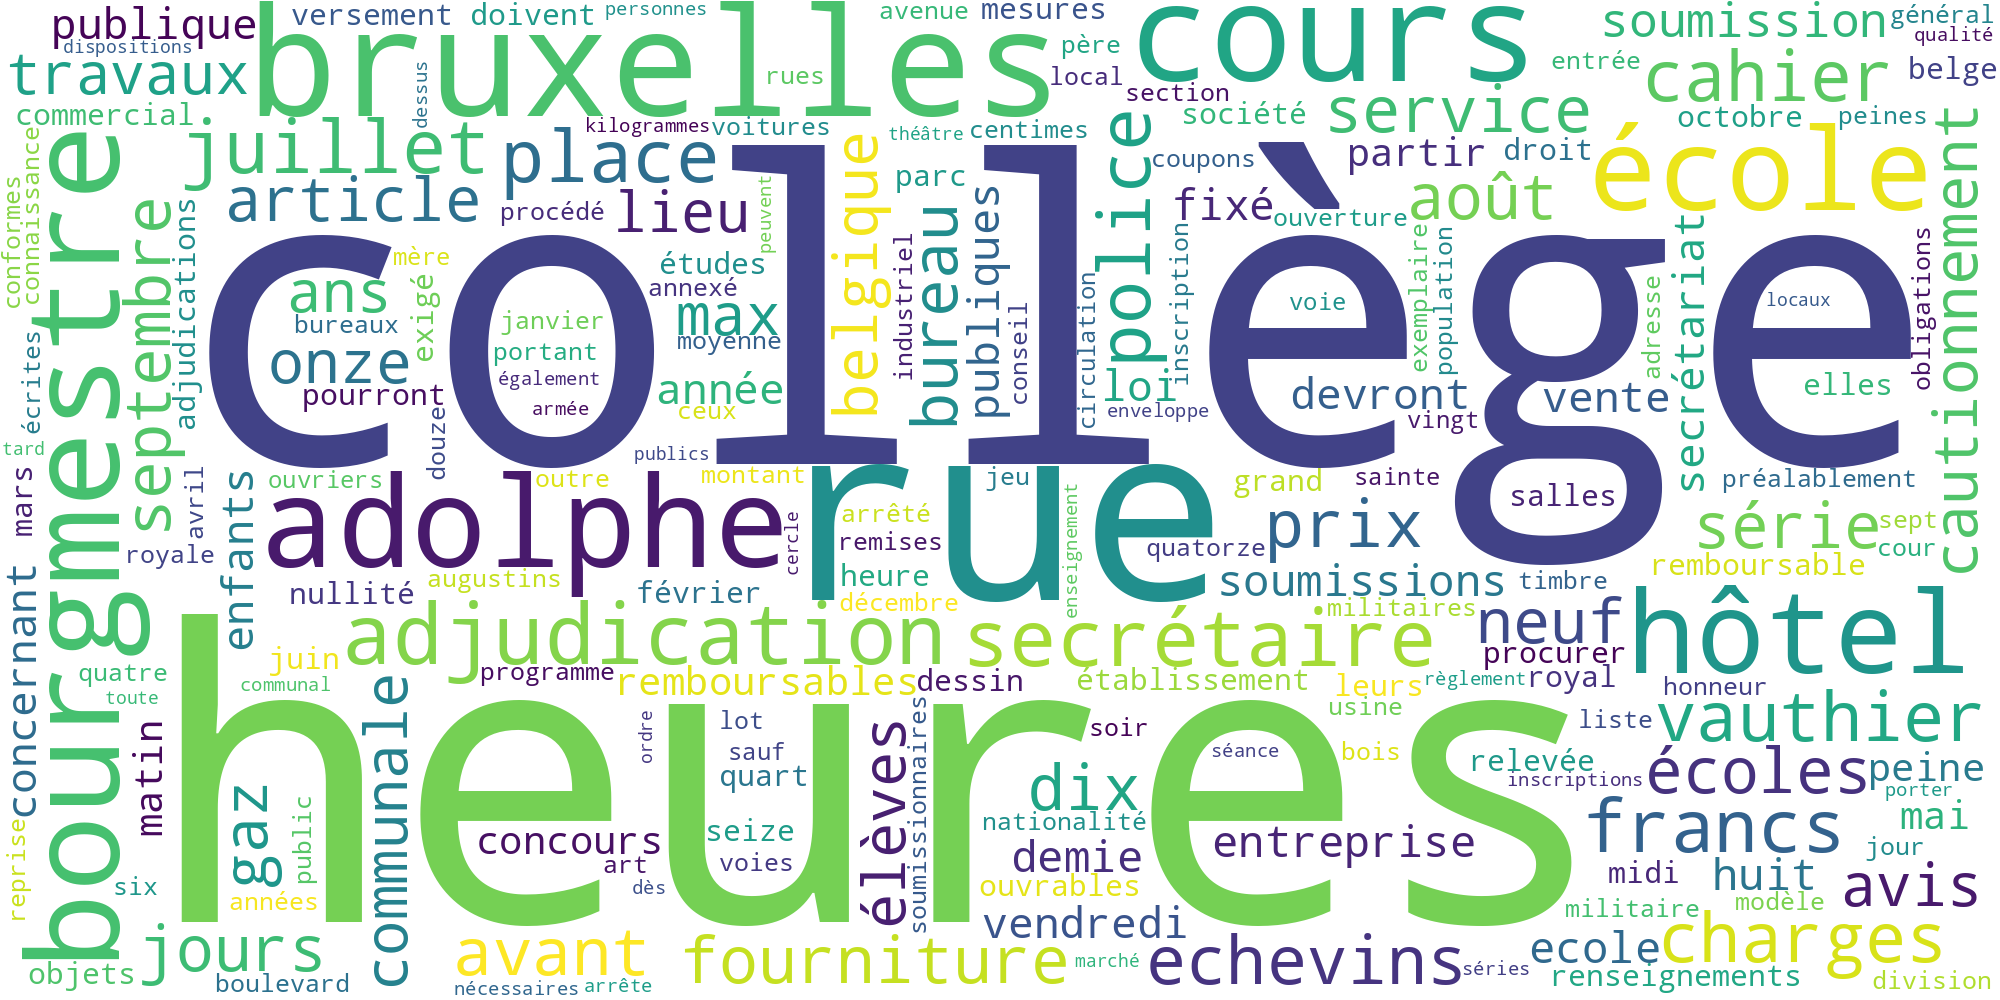

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))